# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-07-01#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="description" content="Get Ethereum (ETH) USD historical prices." />\n\n\n<script>(function(w,d,s,l,'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
table = soup.find('tbody')
print(table.prettify()[1:500])

tbody>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2021-07-01
  </th>
  <td class="text-center">
   $265,951,575,833
  </td>
  <td class="text-center">
   $29,046,221,906
  </td>
  <td class="text-center">
   $2,279.35
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2021-06-30
  </th>
  <td class="text-center">
   $253,607,549,372
  </td>
  <td class="text-center">
   $27,149,143,847
  </td>
  <td class="te


Finding row length.

In [5]:
row = table.find_all('th', attrs={'class':'font-semibold text-center'})
row_length = len(row)
row_length

548

Testing key to scrap data.

In [6]:
table.find_all('th', attrs={'class':'font-semibold text-center'})[:5]

[<th class="font-semibold text-center" scope="row">2021-07-01</th>,
 <th class="font-semibold text-center" scope="row">2021-06-30</th>,
 <th class="font-semibold text-center" scope="row">2021-06-29</th>,
 <th class="font-semibold text-center" scope="row">2021-06-28</th>,
 <th class="font-semibold text-center" scope="row">2021-06-27</th>]

In [7]:
table.find_all('th', attrs={'class':'font-semibold text-center'})[1].text

'2021-06-30'

In [9]:
table.find_all('td', attrs={'class':'text-center'})[1].text.strip()

'$29,046,221,906'

Do the scrapping process here (please change this markdown with your explanation)

Explanation : Using the right key like 'th' and 'td' to find the data location from inspect element's result, and then define the array position like [i] so that we can put the value into new variable and then store it into 'Temp'

In [11]:
temp = [] #initiating a tuple

for i in range(1, row_length):

    #scrapping process
    
    #get Date
    Date = table.find_all('th', attrs={'class':'font-semibold text-center'})[i].text
    
    #get Market Cap
    Market_Cap = table.find_all('td', attrs={'class':'text-center'})[(4*i)].text.strip()
    
    #get Volume
    Volume = table.find_all('td', attrs={'class':'text-center'})[(4*i)+1].text.strip()
    
    #get Open
    Open = table.find_all('td', attrs={'class':'text-center'})[(4*i)+2].text.strip()
    
    #get Close
    Close = table.find_all('td', attrs={'class':'text-center'})[(4*i)+3].text.strip()
    
    temp.append((Date,Market_Cap,Volume,Open,Close))
    
temp 

[('2021-06-30',
  '$253,607,549,372',
  '$27,149,143,847',
  '$2,169.40',
  '$2,279.35'),
 ('2021-06-29',
  '$243,040,539,437',
  '$30,629,329,806',
  '$2,087.52',
  '$2,169.40'),
 ('2021-06-28',
  '$229,354,016,311',
  '$24,316,408,028',
  '$1,973.93',
  '$2,087.52'),
 ('2021-06-27',
  '$209,989,265,221',
  '$24,249,510,321',
  '$1,817.05',
  '$1,973.93'),
 ('2021-06-26',
  '$213,871,849,532',
  '$25,981,381,067',
  '$1,833.46',
  '$1,817.05'),
 ('2021-06-25',
  '$231,644,258,719',
  '$22,447,489,242',
  '$1,990.08',
  '$1,833.46'),
 ('2021-06-24',
  '$229,518,675,837',
  '$28,098,744,045',
  '$1,971.11',
  '$1,990.08'),
 ('2021-06-23',
  '$216,876,757,209',
  '$38,755,019,937',
  '$1,875.36',
  '$1,971.11'),
 ('2021-06-22',
  '$223,202,708,789',
  '$39,499,960,408',
  '$1,900.12',
  '$1,875.36'),
 ('2021-06-21',
  '$261,478,202,409',
  '$26,235,850,447',
  '$2,251.56',
  '$1,900.12'),
 ('2021-06-20',
  '$253,396,709,039',
  '$20,456,963,375',
  '$2,176.31',
  '$2,251.56'),
 ('2021-06

## Creating data frame & Data wrangling

Put the array into dataframe

In [40]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date','Market Cap','Volume','Open','Close'))
df.head()

,Date,Market Cap,Volume,Open,Close
0,2021-06-30,"$253,607,549,372","$27,149,143,847","$2,169.40","$2,279.35"
1,2021-06-29,"$243,040,539,437","$30,629,329,806","$2,087.52","$2,169.40"
2,2021-06-28,"$229,354,016,311","$24,316,408,028","$1,973.93","$2,087.52"
3,2021-06-27,"$209,989,265,221","$24,249,510,321","$1,817.05","$1,973.93"
4,2021-06-26,"$213,871,849,532","$25,981,381,067","$1,833.46","$1,817.05"


Check the data type.

In [41]:
df.dtypes

Date          object
Market Cap    object
Volume        object
Open          object
Close         object
dtype: object

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

Explanation : Change the data type for each field according to its type.

- 'Date' should use datetime64
- 'Market Cap' should use int64
- 'Volume' should use int64
- 'Open' should use float64
- 'Close' should use float64

In [42]:
df['Date'] = df['Date'].astype('datetime64')

df['Market Cap'] = df['Market Cap'].str.replace(",","")
df['Market Cap'] = df['Market Cap'].str.replace("$","", regex=False).astype('int64')

df['Volume'] = df['Volume'].str.replace(",","")
df['Volume'] = df['Volume'].str.replace("$","", regex=False).astype('int64')

df['Open'] = df['Open'].str.replace(",","")
df['Open'] = df['Open'].str.replace("$","", regex=False).astype('float64')

df['Close'] = df['Close'].str.replace(",","")
df['Close'] = df['Close'].str.replace("$","", regex=False).astype('float64')

df.dtypes

Date          datetime64[ns]
Market Cap             int64
Volume                 int64
Open                 float64
Close                float64
dtype: object

In case you want the numbers in currency format, I'll add another 4 fields

In [43]:
df['Market Cap2'] = df['Market Cap'].map('${:,}'.format)
df['Volume2'] = df['Volume'].map('${:,}'.format)
df['Open2'] = df['Open'].map('${:,.2f}'.format)
df['Close2'] = df['Close'].map('${:,.2f}'.format)
df.head()

,Date,Market Cap,Volume,Open,Close,Market Cap2,Volume2,Open2,Close2
0,2021-06-30,253607549372,27149143847,2169.40,2279.35,"$253,607,549,372","$27,149,143,847","$2,169.40","$2,279.35"
1,2021-06-29,243040539437,30629329806,2087.52,2169.40,"$243,040,539,437","$30,629,329,806","$2,087.52","$2,169.40"
2,2021-06-28,229354016311,24316408028,1973.93,2087.52,"$229,354,016,311","$24,316,408,028","$1,973.93","$2,087.52"
3,2021-06-27,209989265221,24249510321,1817.05,1973.93,"$209,989,265,221","$24,249,510,321","$1,817.05","$1,973.93"
4,2021-06-26,213871849532,25981381067,1833.46,1817.05,"$213,871,849,532","$25,981,381,067","$1,833.46","$1,817.05"


In [44]:
df.dtypes

Date           datetime64[ns]
Market Cap              int64
Volume                  int64
Open                  float64
Close                 float64
Market Cap2            object
Volume2                object
Open2                  object
Close2                 object
dtype: object

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

<AxesSubplot:xlabel='Date'>

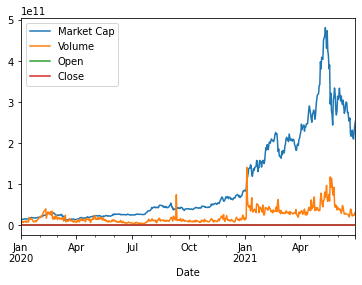

In [51]:
df2 = df.set_index("Date")
df2.plot()

In [4]:
card_data = f'{df2["Volume"].mean().round(2)}' #be careful with the " and ' 
ax = card_data.plot(figsize = (20,9)) 

NameError: name 'df2' is not defined

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.